In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv('spotify_data.csv',index_col=0)
df.head(5)

C:\Users\Carson\AppData\Local\Temp\ipykernel_16224\1915144386.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,artists,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


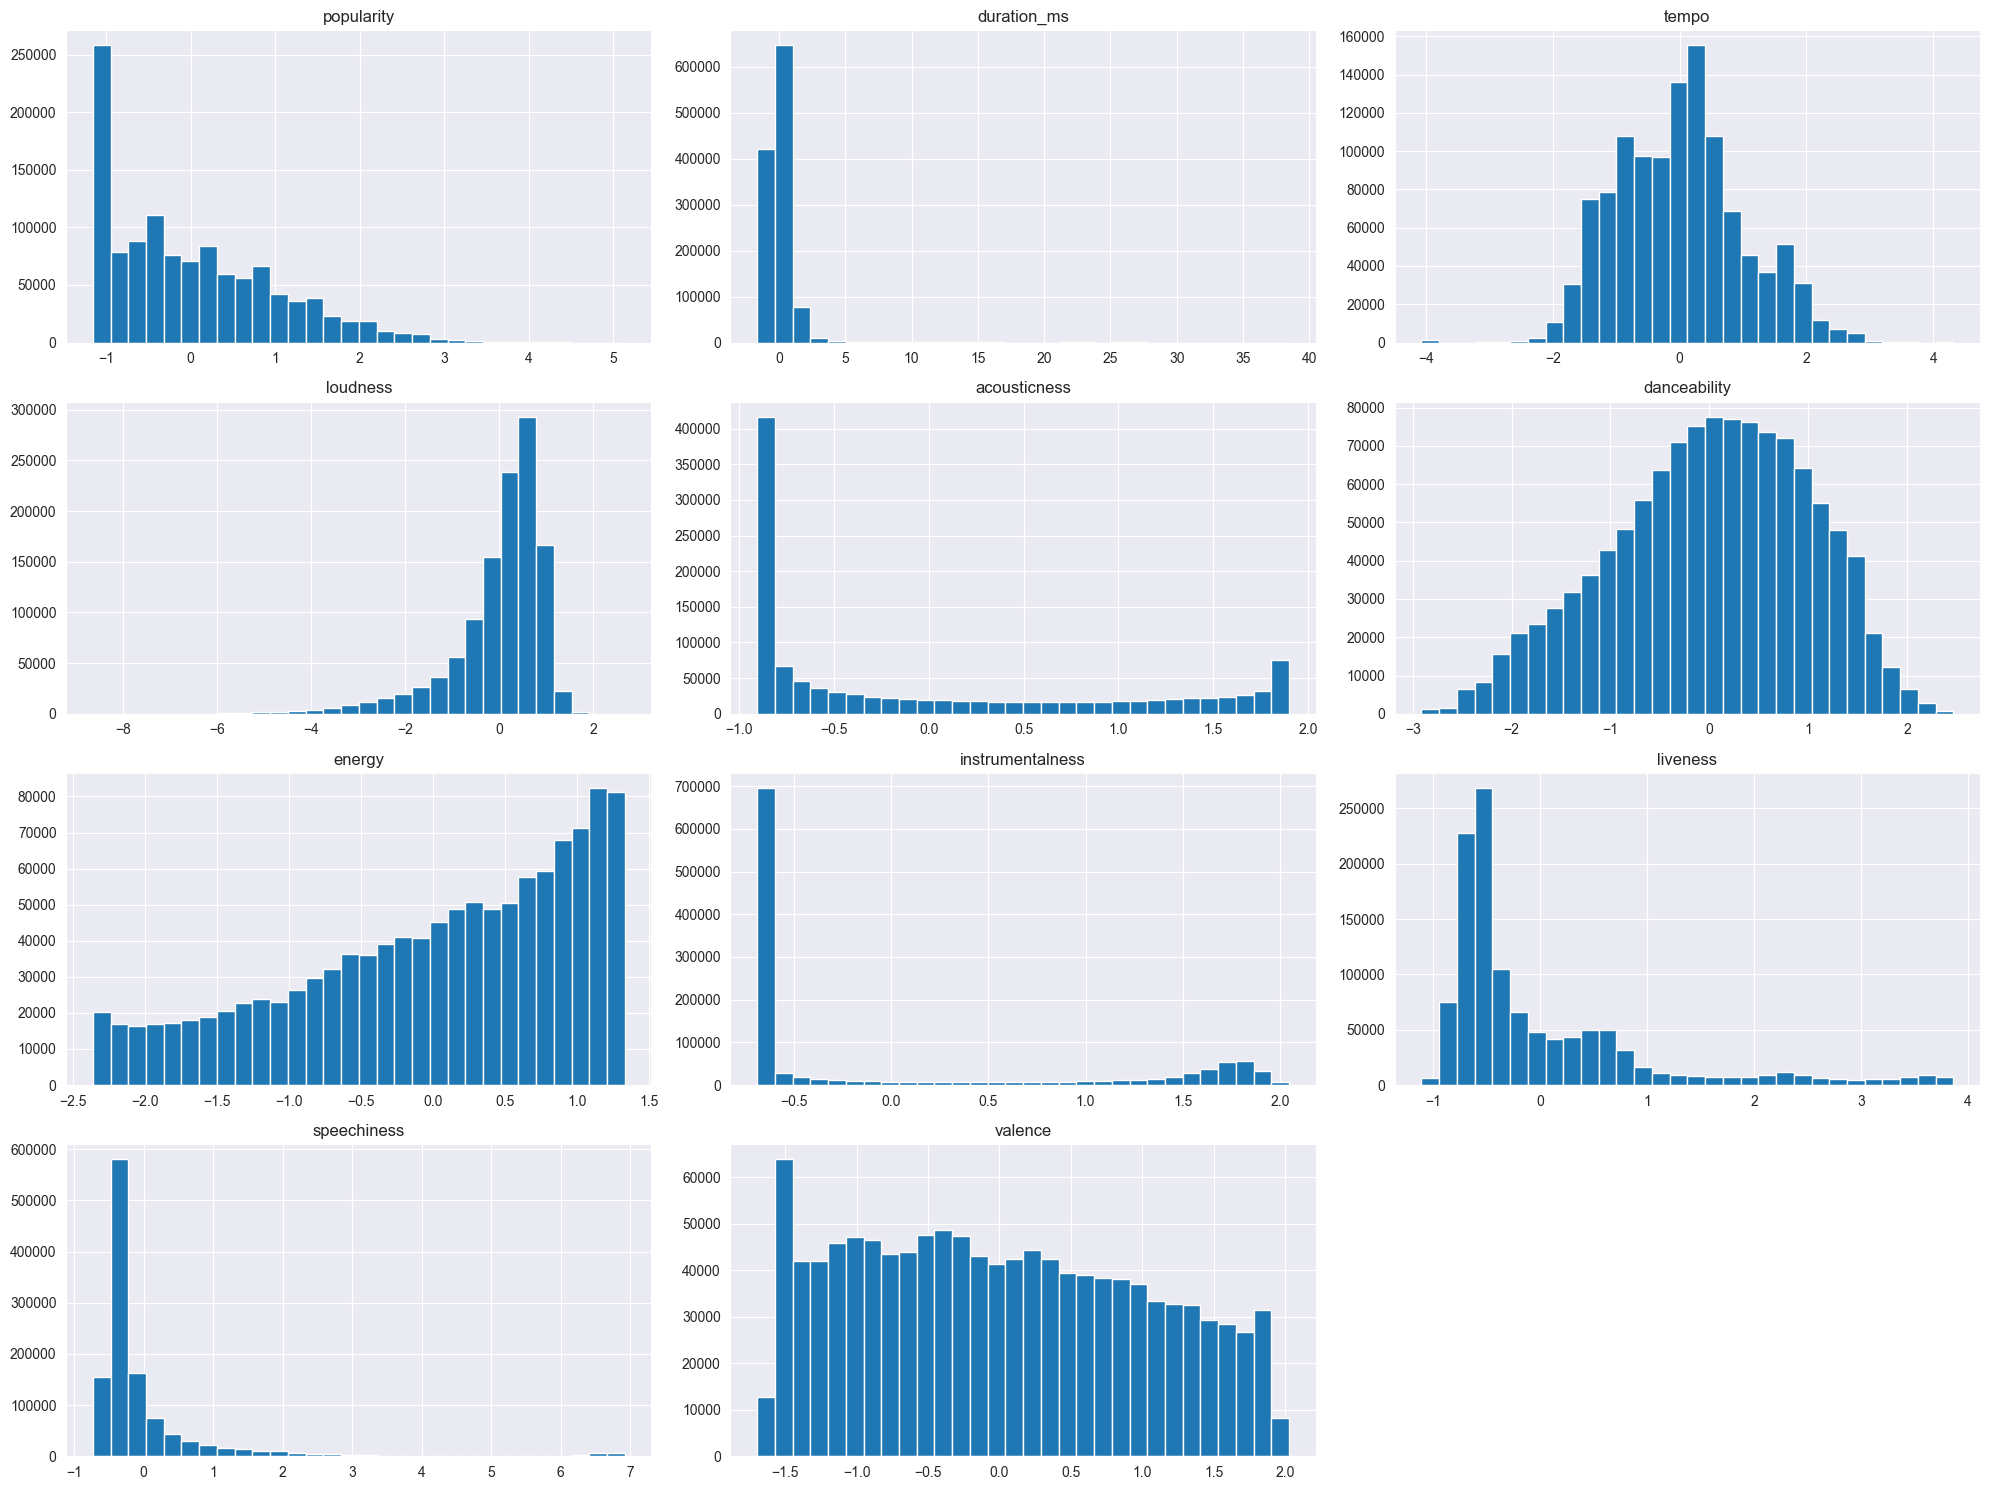

In [2]:

features_to_plot = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Normalize selected attributes using z-score normalization
scaler = StandardScaler()
df[features_to_plot] = scaler.fit_transform(df[features_to_plot])

sns.set_style('darkgrid')
df[features_to_plot].hist(figsize = (20,15), bins = 30)
plt.tight_layout()
plt.show()

- danceability and tempo have nearly normal distributions
- loudness, acousticness, speechiness, liveliness are skewed, with loudness being left-skewed and the rest being right-skewed
- energy has an increasing distribution

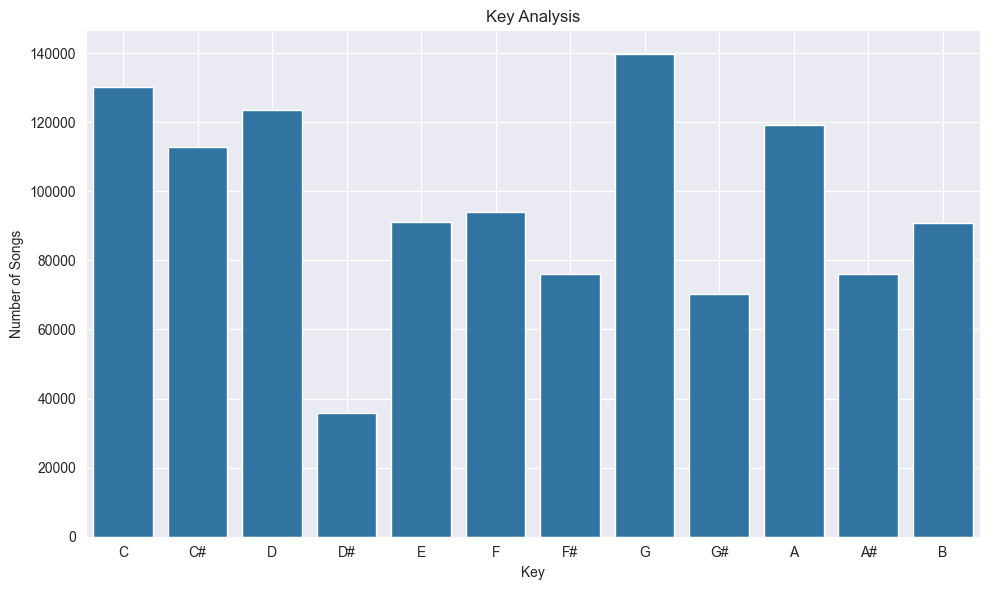

In [4]:
# Select the column for the key
key_column = 'key'

def key_analysis():
    # Count the number of songs in each key
    key_counts = df[key_column].value_counts().sort_index()
    
    # Create a bar chart to visualize the prevalence of each key
    plt.figure(figsize=(10, 6))
    sns.barplot(x=key_counts.index, y=key_counts.values)
    
    plt.title('Key Analysis')
    plt.xlabel('Key')
    plt.ylabel('Number of Songs')
    plt.xticks(ticks=range(12), labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
key_analysis()


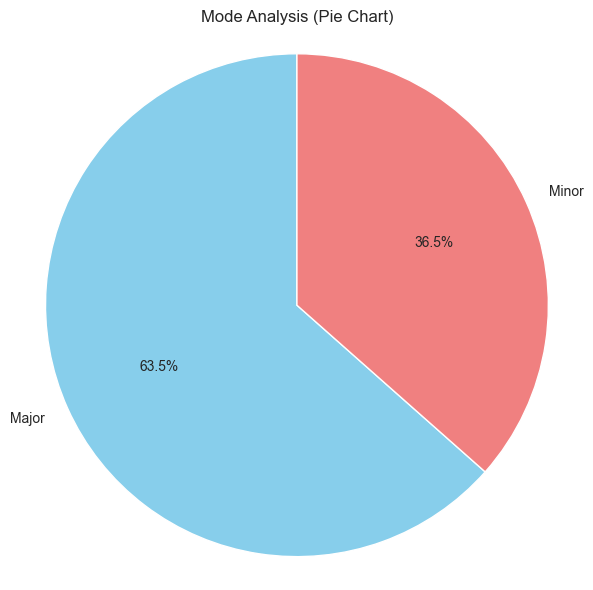

In [5]:
# Select the column for mode
mode_column = 'mode'

def mode_analysis_pie_chart():
    # Count the number of songs in major and minor modes
    mode_counts = df[mode_column].value_counts()
    
    # Create a pie chart to visualize the distribution of major and minor songs
    plt.figure(figsize=(6, 6))
    plt.pie(mode_counts, labels=['Major', 'Minor'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
    
    plt.title('Mode Analysis (Pie Chart)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    plt.tight_layout()
    plt.show()

# Example usage:
mode_analysis_pie_chart()

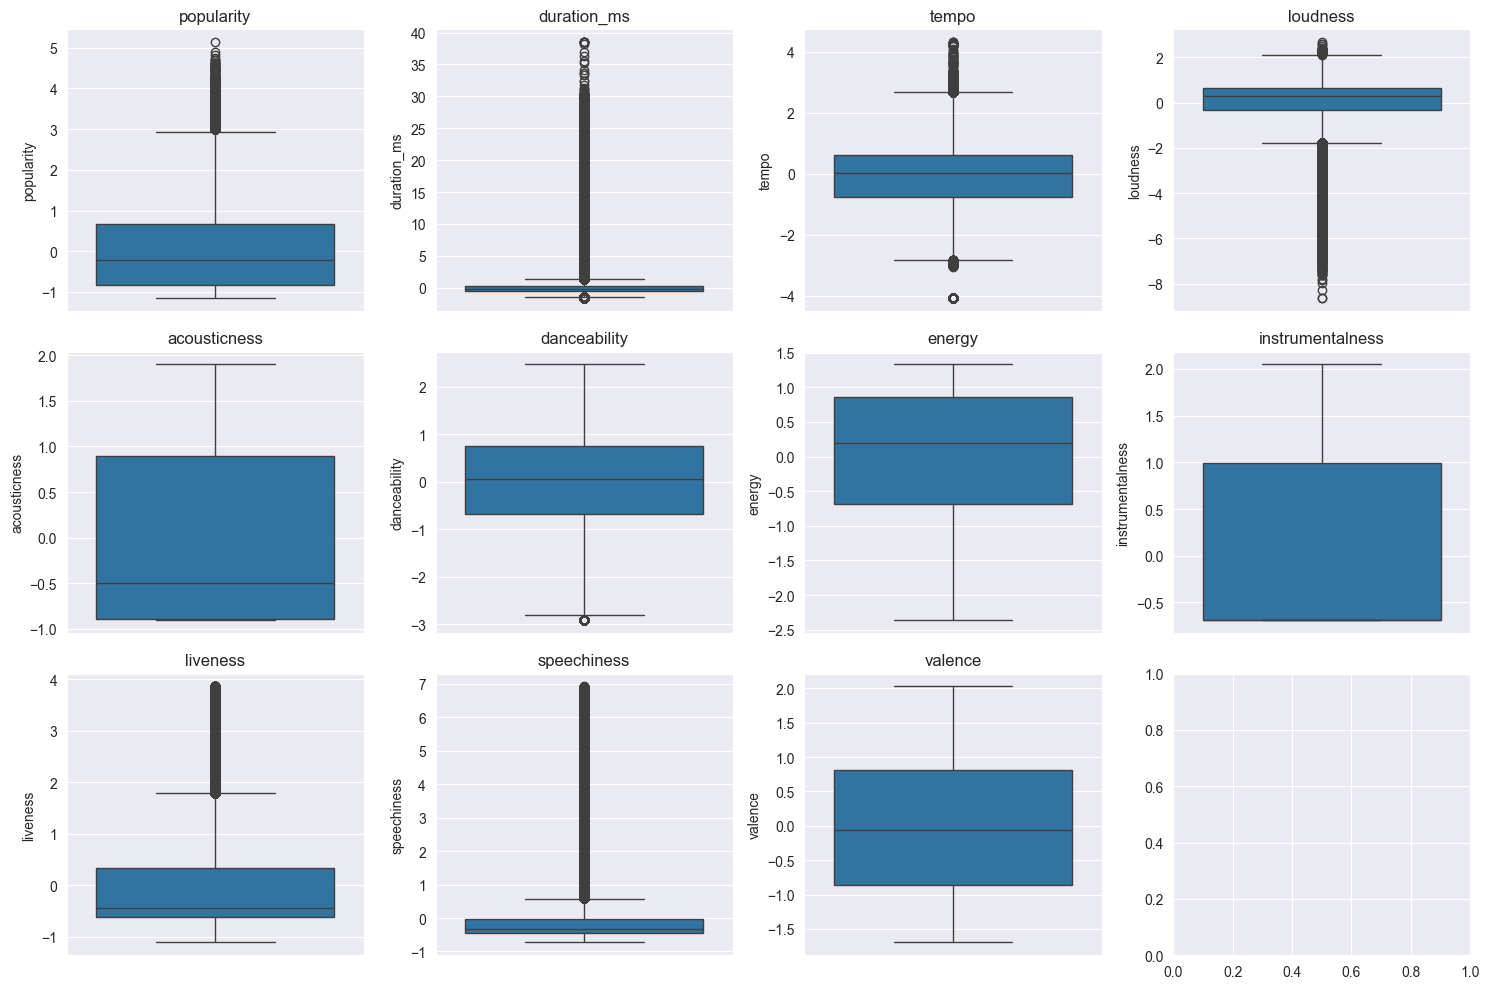

In [10]:
# boxplot for numerical columns
features_to_plot = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
for i, col in enumerate(features_to_plot):
    sns.boxplot(y=col, data=df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

- acousticness, energy and valence have no outliers
- all of the other features have many outliers which makes sense since they are features that describe a song and are thus useful and should be kept to keep the diversity of the songs in the dataset 

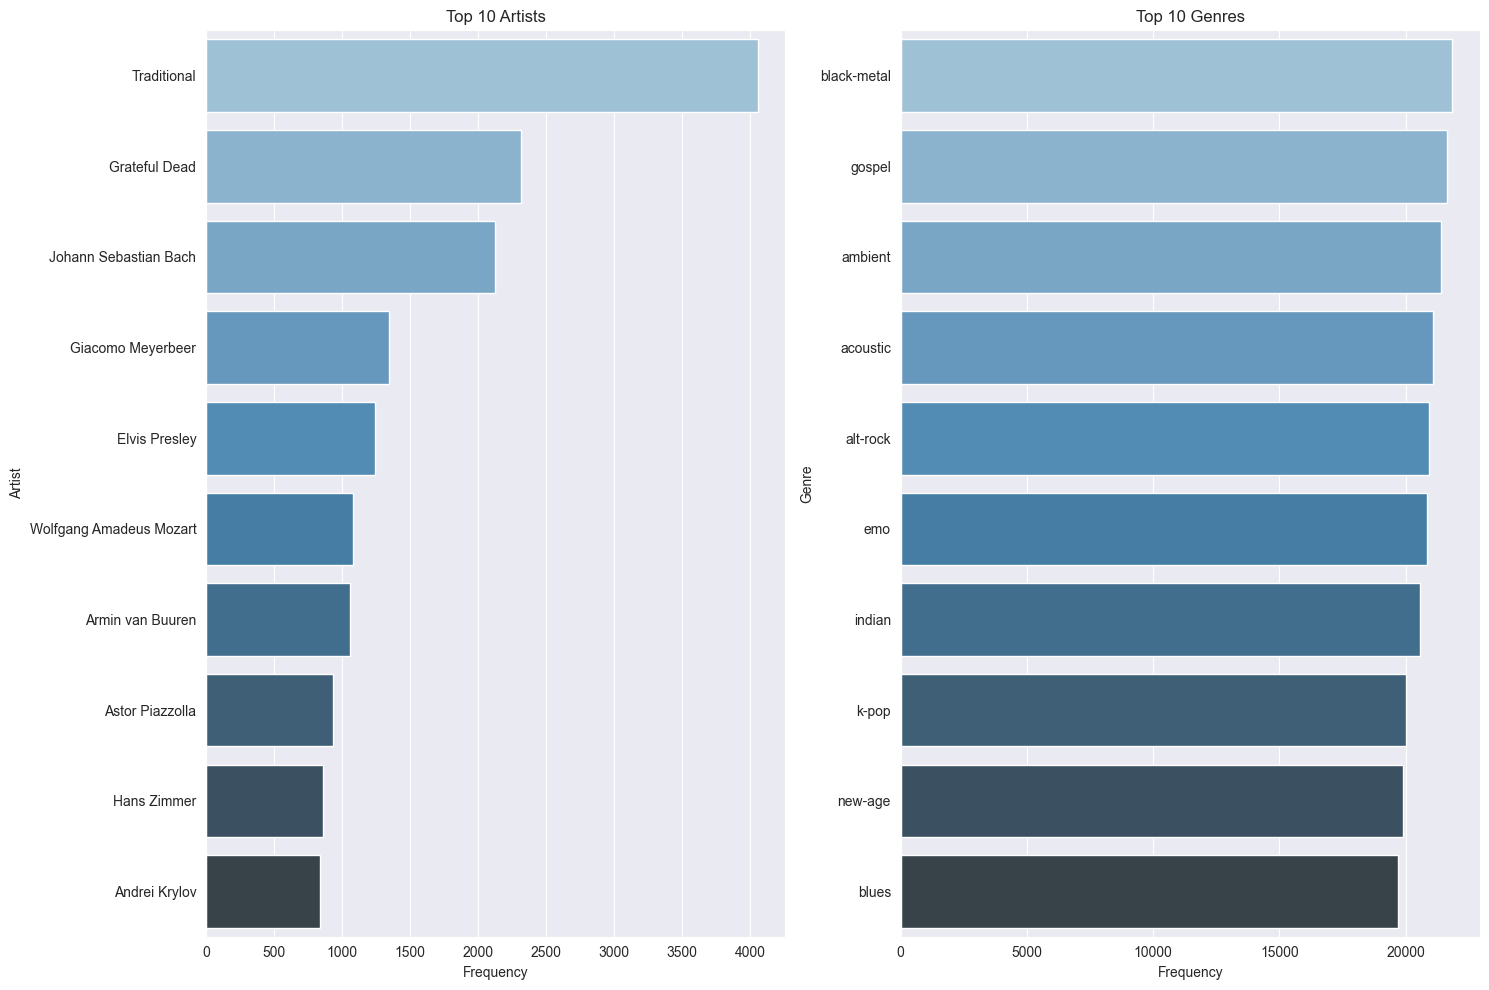

In [11]:
top = 10
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top)
top_genres = df['genre'].value_counts().head(top)

# Plotting
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))

# Top N Artists
sns.barplot(x = top_artists.values, y = top_artists.index, hue = top_artists.index, palette="Blues_d", ax=axes[0], legend = False)
axes[0].set_title(f'Top 10 Artists')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Artist')

# Top N Genres
sns.barplot(x = top_genres.values, y = top_genres.index, hue = top_genres.index, palette = "Blues_d", ax = axes[1], legend = False)
axes[1].set_title(f'Top 10 Genres')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()



- most of the artists in the top 10 are known around the world such as Bach, Mozart, grateful dead, Hans Zimmer, Armin van Buuren, and Elvis Presley
- Traditional as an artist is used for folk songs that have no known original artist
- the top 10 genres are slightly surprising since only a few are considered mainstream popular genres

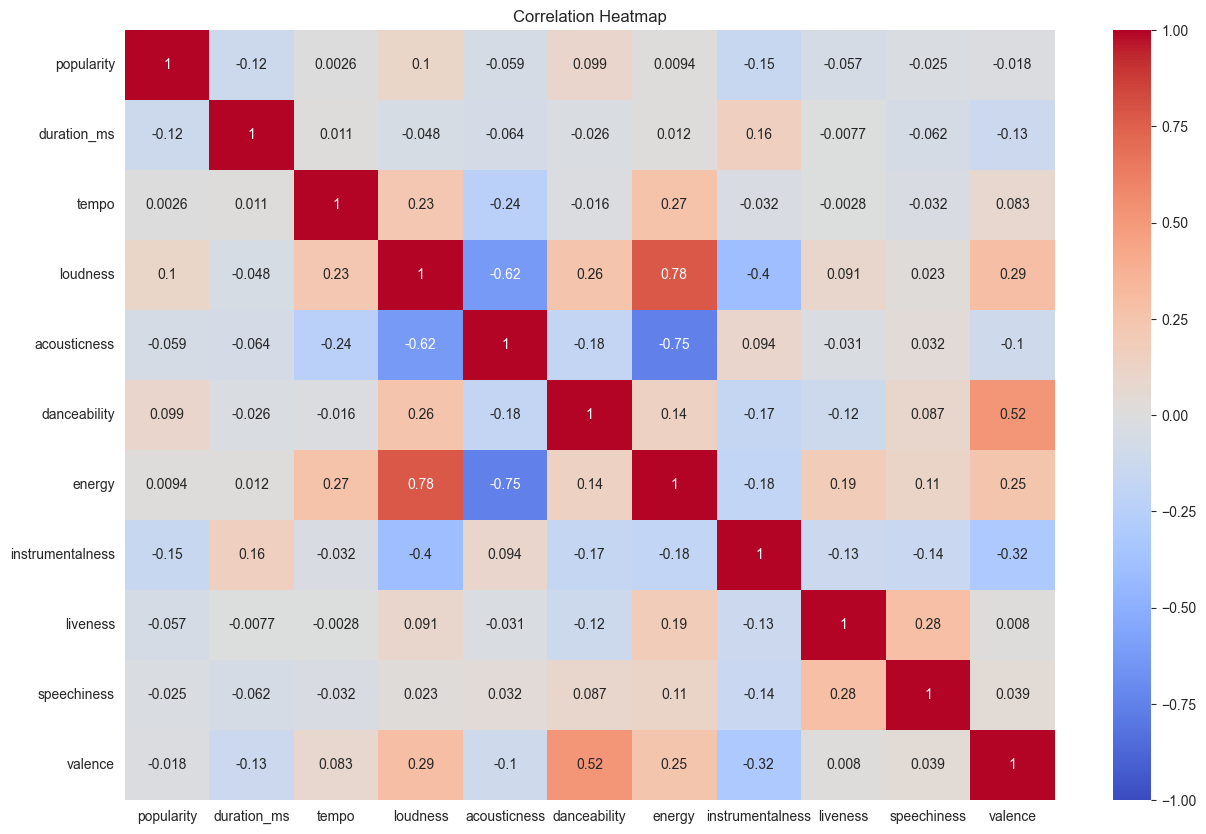

In [12]:
# heatmap for correlation
corr = df[features_to_plot].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- there is a significant positive correlation between energy and loudness
- there are significant negative correlations between acousticness and loudness, and energy and acousticness
- there is a positive correlation between valence and danceability
- there is a negative correlation between isntrumentalness and loudness

In [5]:
tracks_f = pd.read_csv("./data/cleaned_data_f.csv")

unique_genres = tracks_f['genre'].unique()

print("Unique genres in the dataset:")
for genre in unique_genres:
    print(genre)

Unique genres in the dataset:
alt-rock
classical
country
edm
hip-hop
jazz
pop
punk-rock
rock


In [4]:
tracks_mil = pd.read_csv("./data/cleaned_data_mil.csv")

unique_genres = tracks_mil['genre'].unique()

print("Unique genres in the dataset:")
for genre in unique_genres:
    print(genre)

Unique genres in the dataset:
alt-rock
classical
country
pop
edm
punk-rock
rock
hip-hop
jazz
